<a href="https://colab.research.google.com/github/Olamaryse/magic-telescope/blob/main/fcc_magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

   g = gamma (signal):     12332
   h = hadron (background): 6688

In [46]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("sample_data/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [15]:
df["class"] = (df["class"] == "g").astype(int)

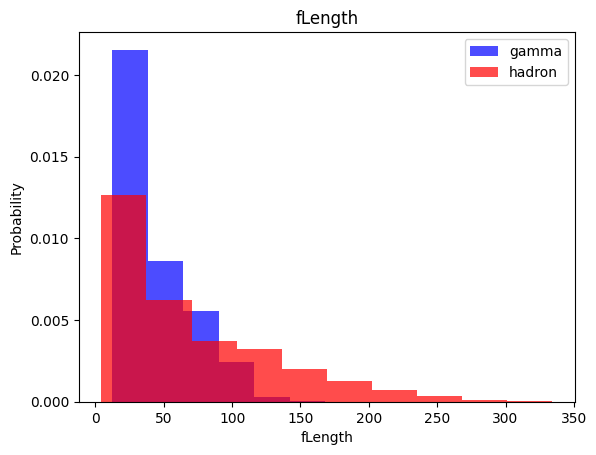

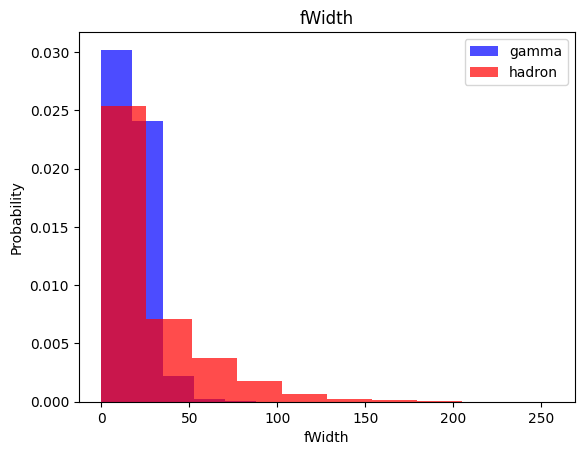

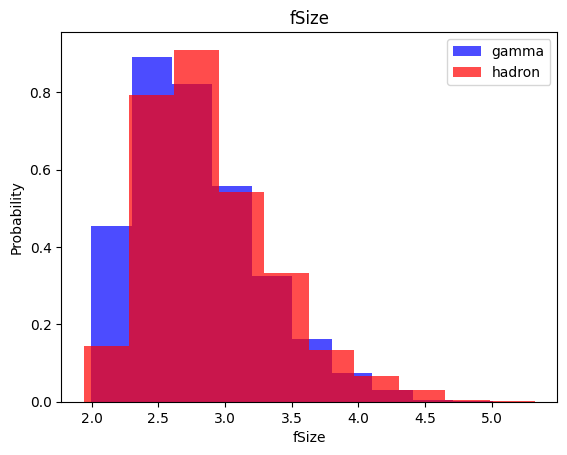

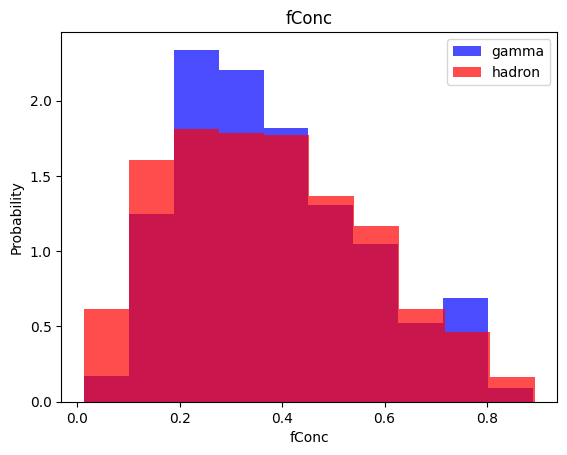

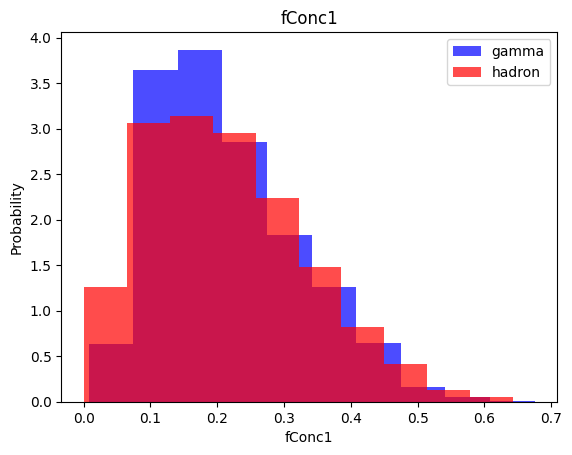

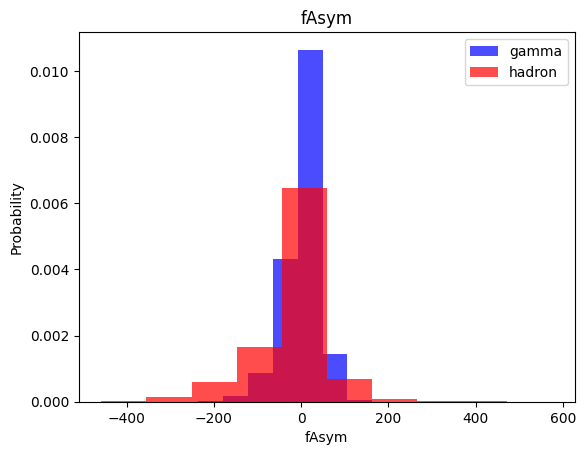

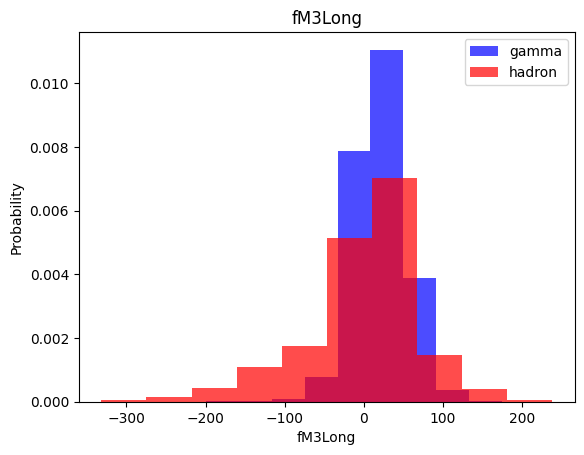

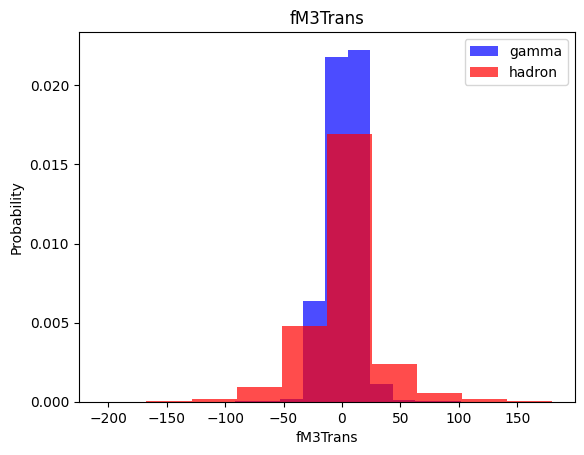

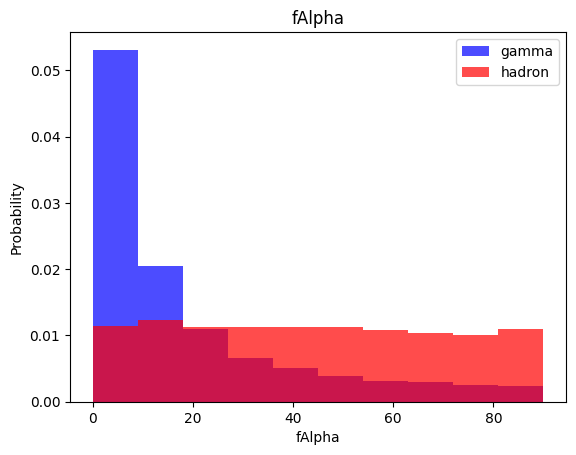

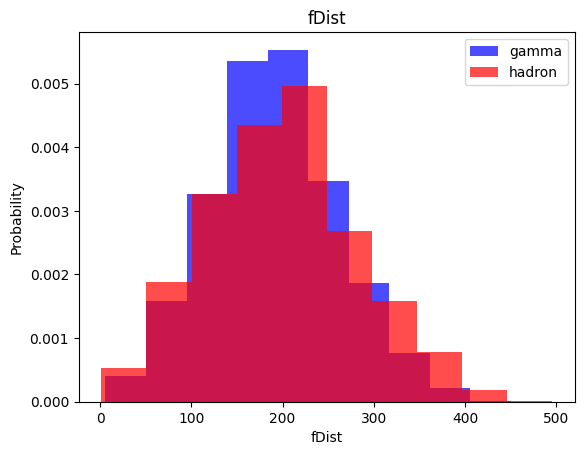

In [16]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", density=True, alpha=0.7)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", density=True, alpha=0.7)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation, test datasets

In [17]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

## kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn_model.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1369
           1       0.85      0.85      0.85      2435

    accuracy                           0.80      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.80      0.80      3804



## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [28]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1369
           1       0.73      0.91      0.81      2435

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [31]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1369
           1       0.84      0.82      0.83      2435

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## SVM

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [34]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1369
           1       0.89      0.90      0.89      2435

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Net

In [35]:
import tensorflow as tf

In [38]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history["loss"], label="loss")
  ax1.plot(history.history["val_loss"], label="val_loss")
  ax1.set_xlabel("Epoch")
  plt.ylabel("Binary crossentropy")
  ax1.grid(True)

  ax2.plot(history.history["accuracy"], label="accuracy")
  ax2.plot(history.history["val_accuracy"], label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)

  plt.show()

In [42]:
plot_history(history)

NameError: name 'history' is not defined

In [41]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

  history = nn_model.fit(
      x_train, y_train,
      validation_split=0.2,
      batch_size=batch_size,
      epochs=epochs,
      verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


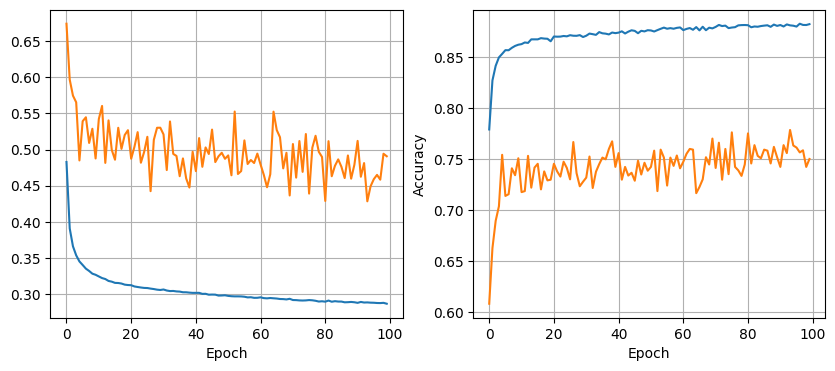

16 nodes, dropout 0, lr 0.01, batch size 64


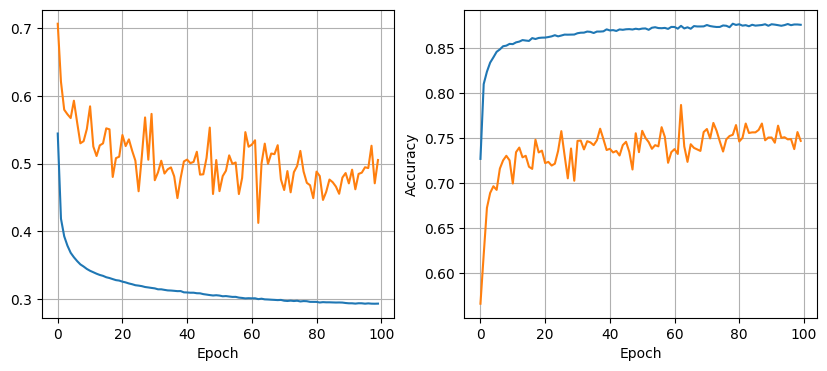

16 nodes, dropout 0, lr 0.01, batch size 128


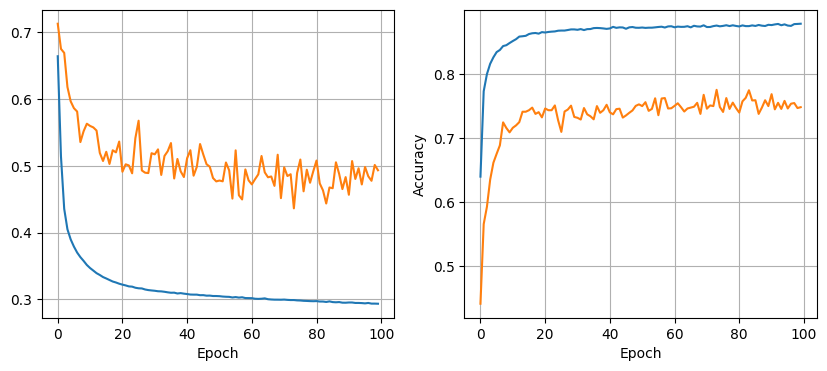

16 nodes, dropout 0, lr 0.05, batch size 32


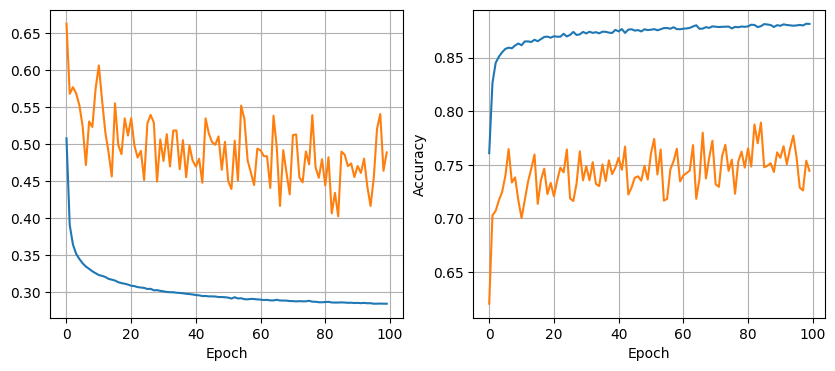

16 nodes, dropout 0, lr 0.05, batch size 64


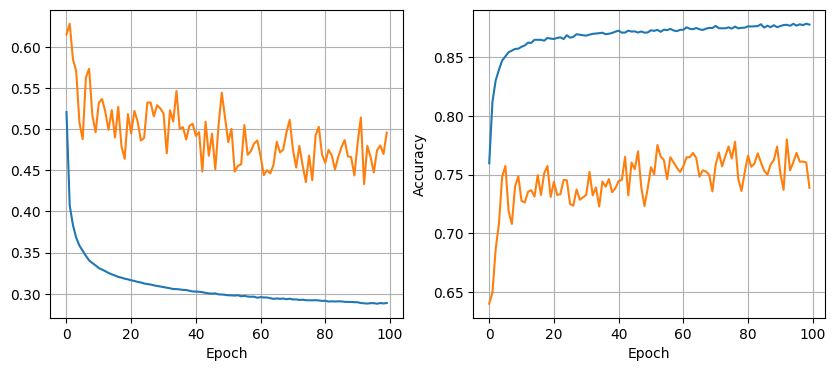

16 nodes, dropout 0, lr 0.05, batch size 128


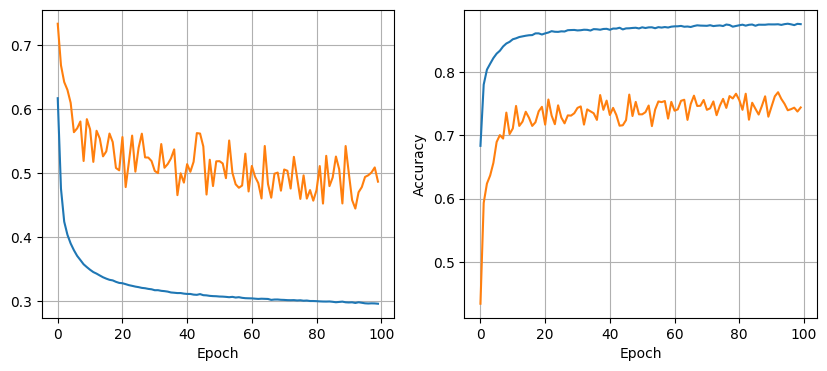

16 nodes, dropout 0, lr 0.1, batch size 32


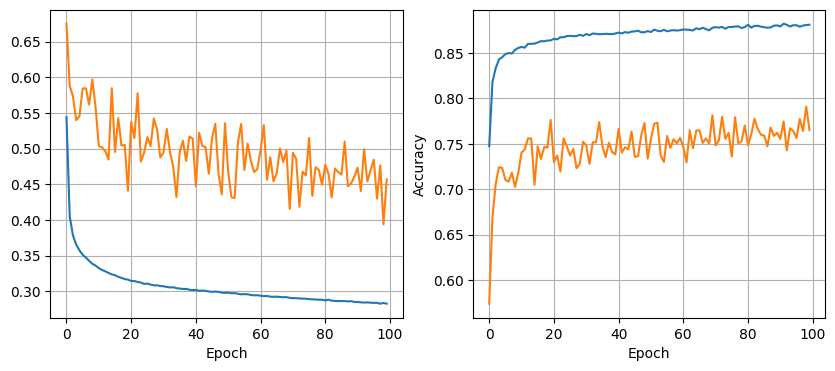

16 nodes, dropout 0, lr 0.1, batch size 64


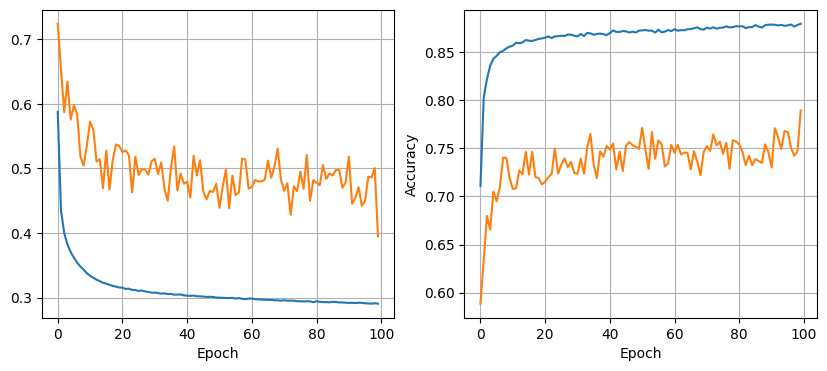

16 nodes, dropout 0, lr 0.1, batch size 128


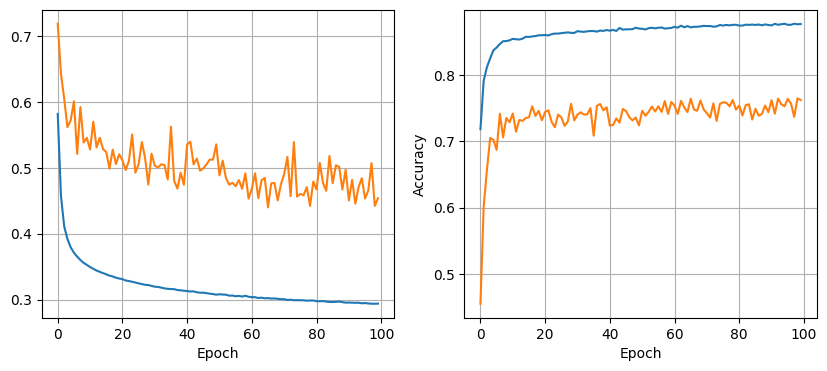

16 nodes, dropout 0.2, lr 0.01, batch size 32


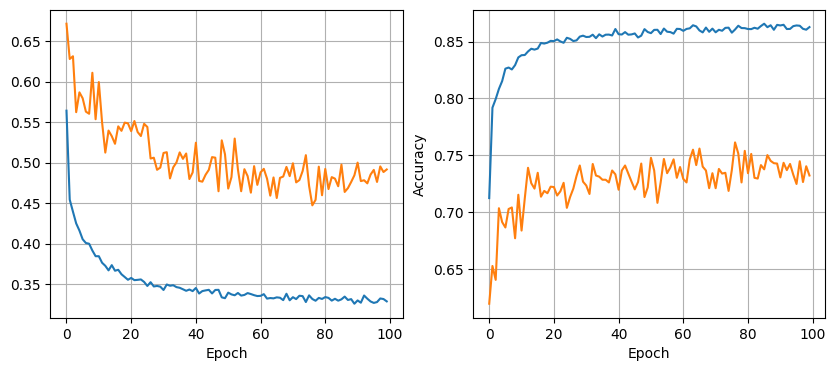

16 nodes, dropout 0.2, lr 0.01, batch size 64


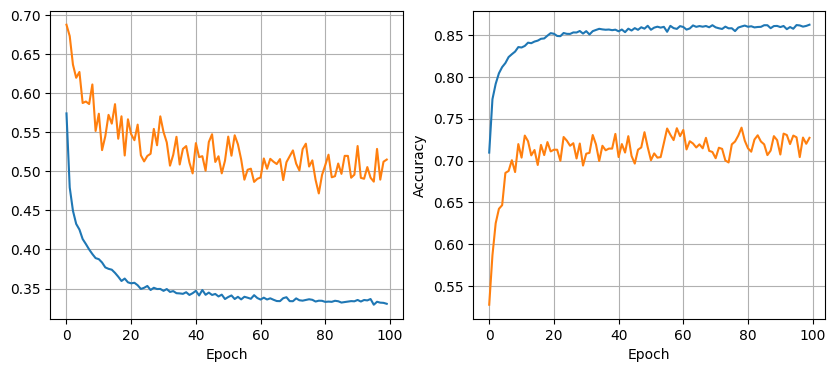

16 nodes, dropout 0.2, lr 0.01, batch size 128


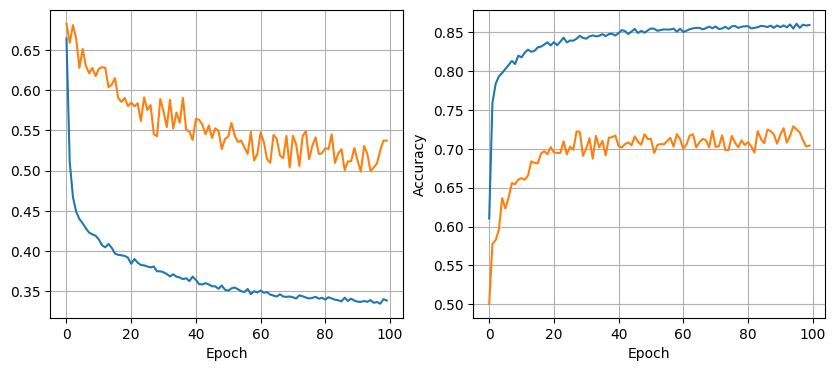

16 nodes, dropout 0.2, lr 0.05, batch size 32


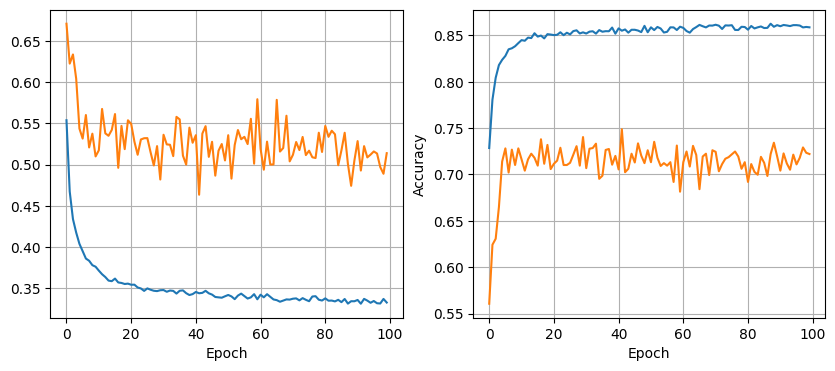

16 nodes, dropout 0.2, lr 0.05, batch size 64


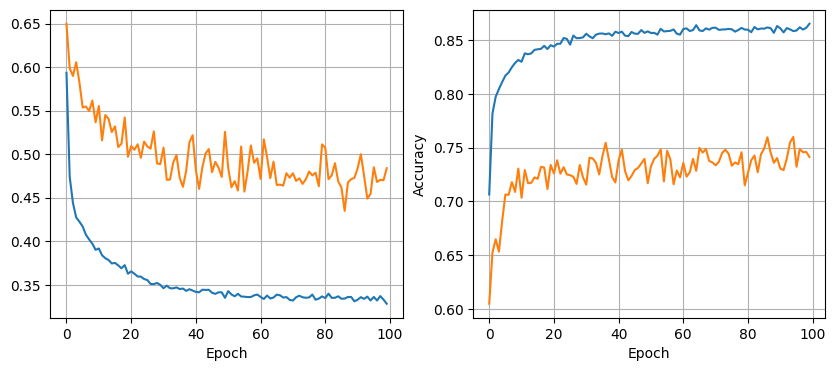

16 nodes, dropout 0.2, lr 0.05, batch size 128


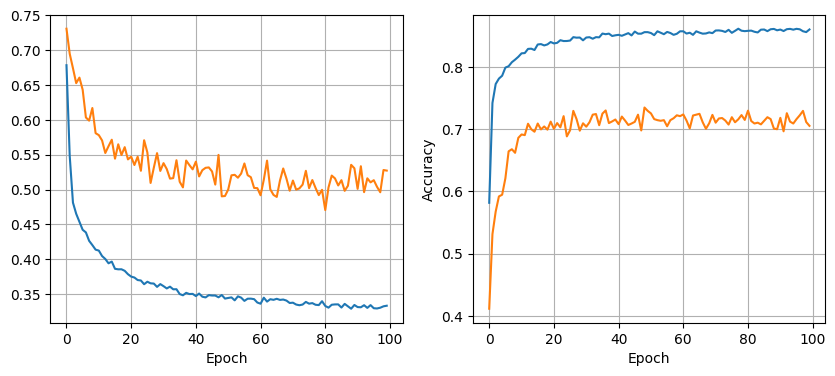

16 nodes, dropout 0.2, lr 0.1, batch size 32


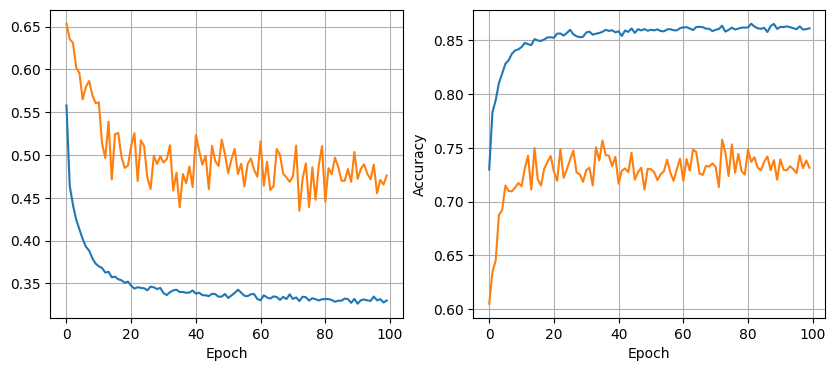

16 nodes, dropout 0.2, lr 0.1, batch size 64


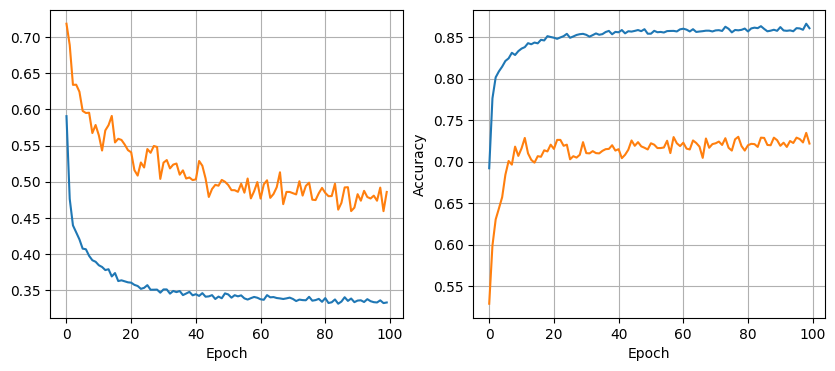

16 nodes, dropout 0.2, lr 0.1, batch size 128


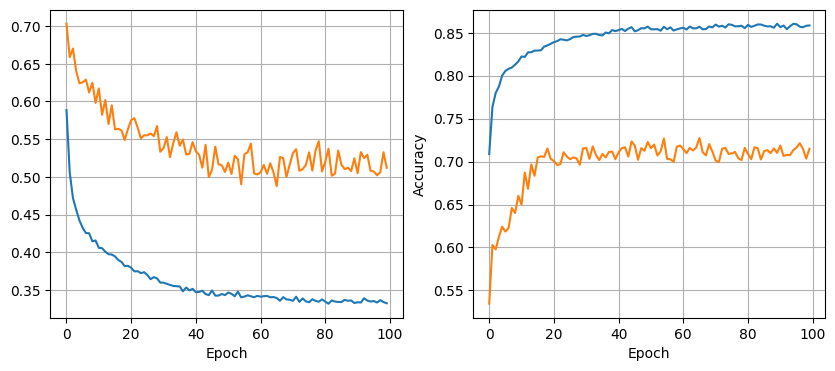

32 nodes, dropout 0, lr 0.01, batch size 32


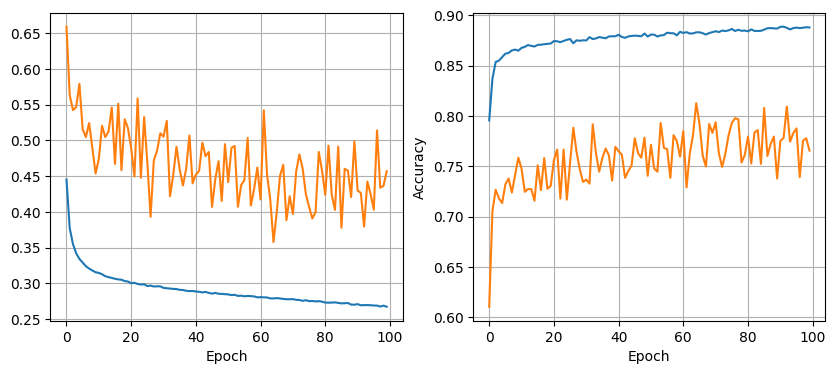

32 nodes, dropout 0, lr 0.01, batch size 64


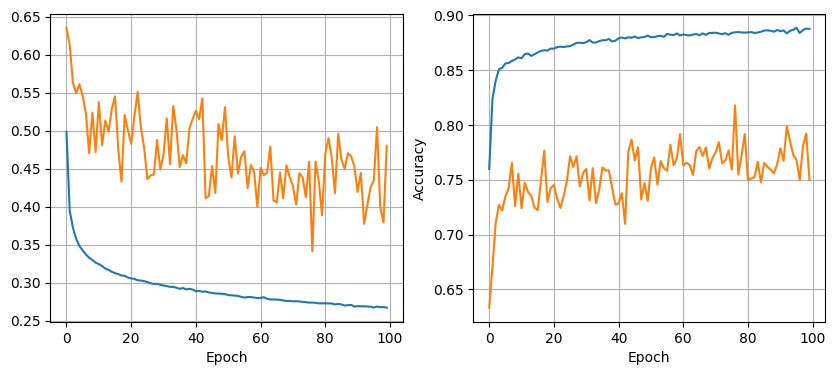

32 nodes, dropout 0, lr 0.01, batch size 128


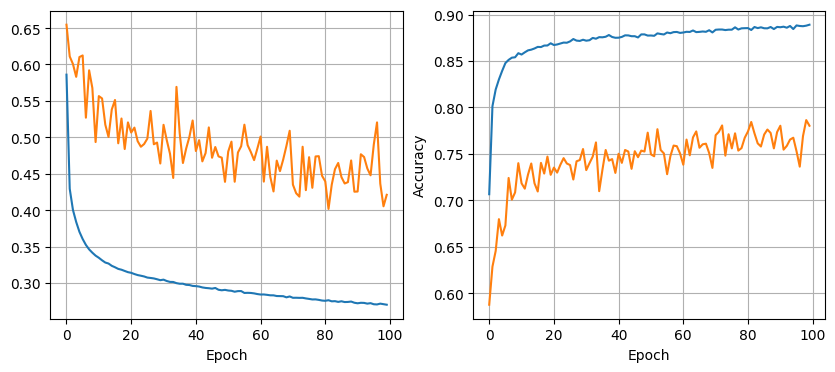

32 nodes, dropout 0, lr 0.05, batch size 32


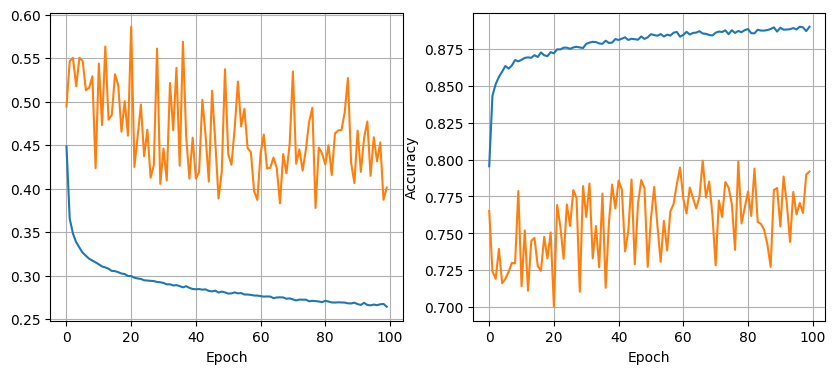

32 nodes, dropout 0, lr 0.05, batch size 64


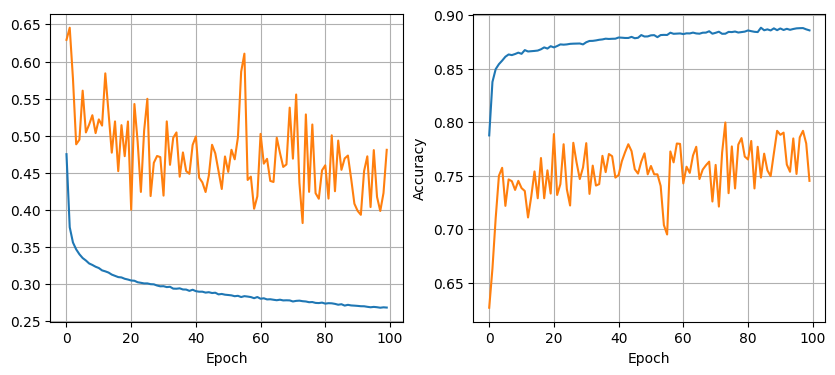

32 nodes, dropout 0, lr 0.05, batch size 128


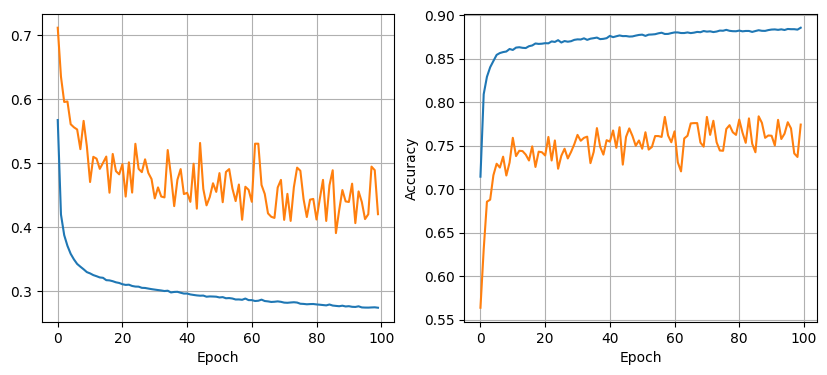

32 nodes, dropout 0, lr 0.1, batch size 32


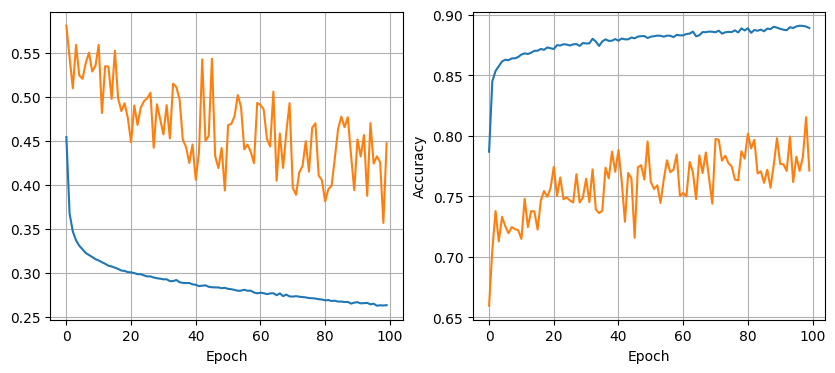

32 nodes, dropout 0, lr 0.1, batch size 64


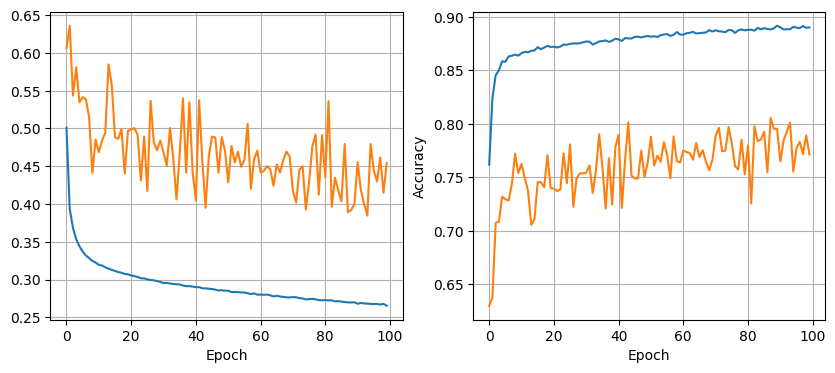

32 nodes, dropout 0, lr 0.1, batch size 128


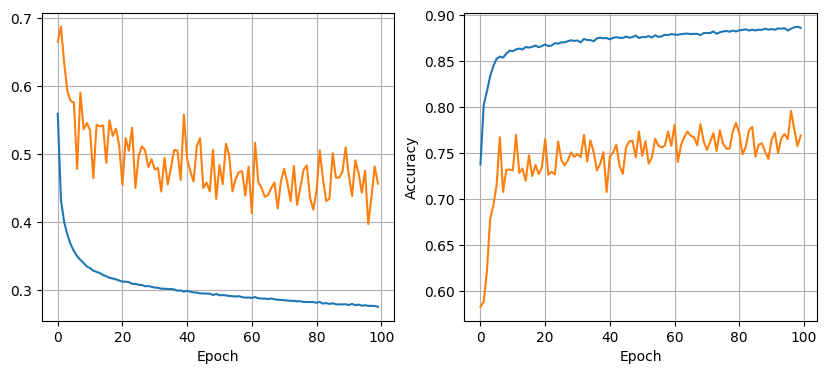

32 nodes, dropout 0.2, lr 0.01, batch size 32


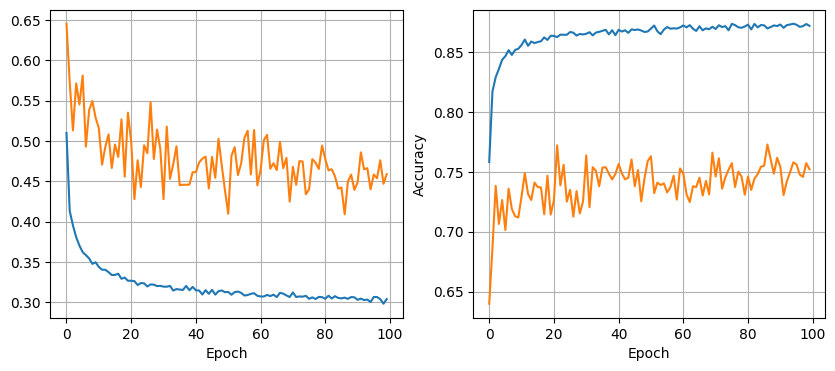

32 nodes, dropout 0.2, lr 0.01, batch size 64


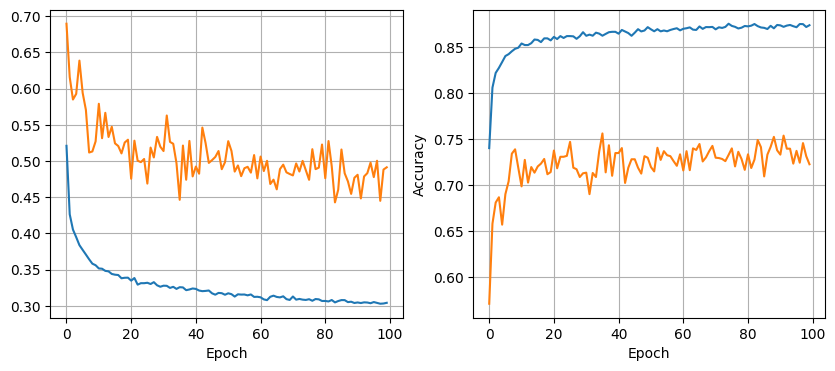

32 nodes, dropout 0.2, lr 0.01, batch size 128


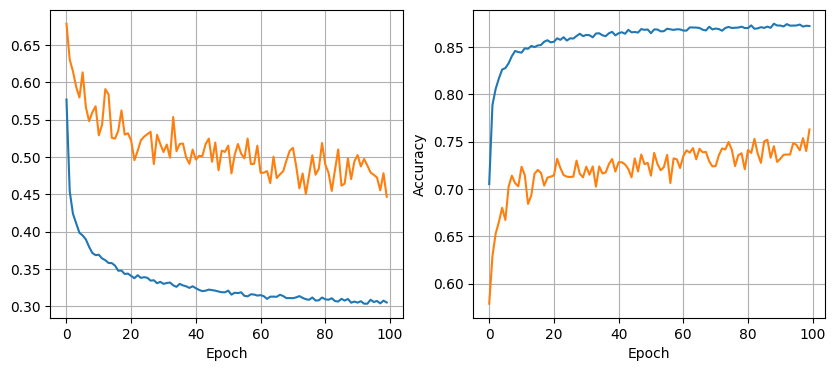

32 nodes, dropout 0.2, lr 0.05, batch size 32


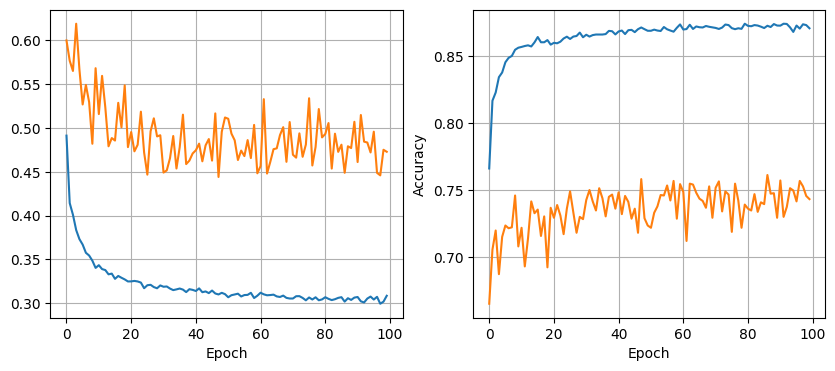

32 nodes, dropout 0.2, lr 0.05, batch size 64


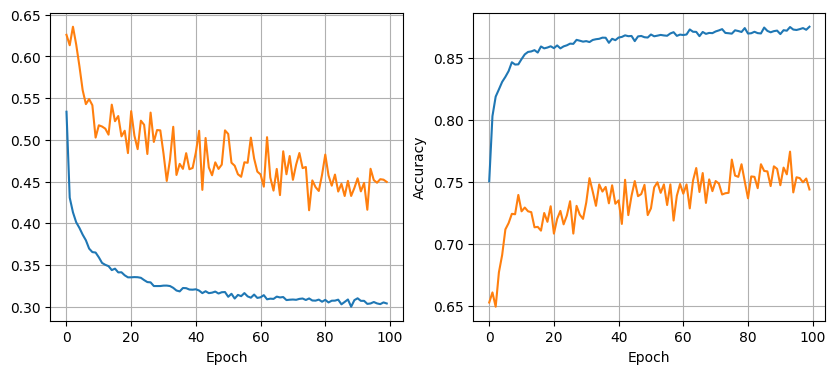

32 nodes, dropout 0.2, lr 0.05, batch size 128


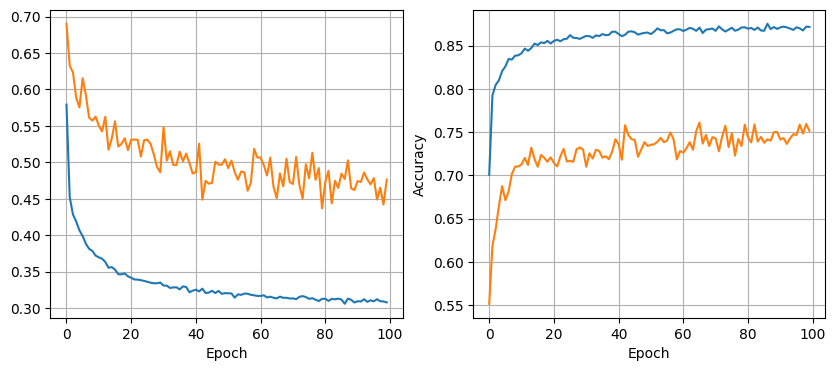

32 nodes, dropout 0.2, lr 0.1, batch size 32


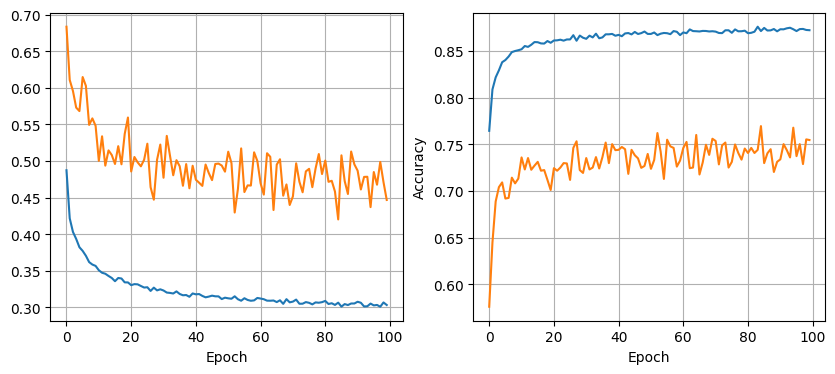

32 nodes, dropout 0.2, lr 0.1, batch size 64


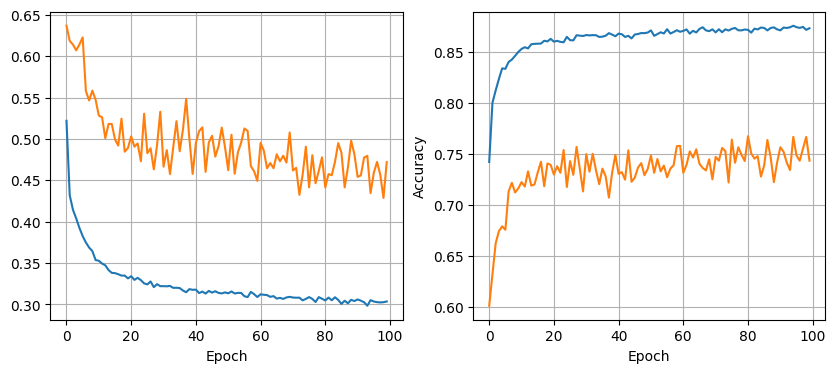

32 nodes, dropout 0.2, lr 0.1, batch size 128


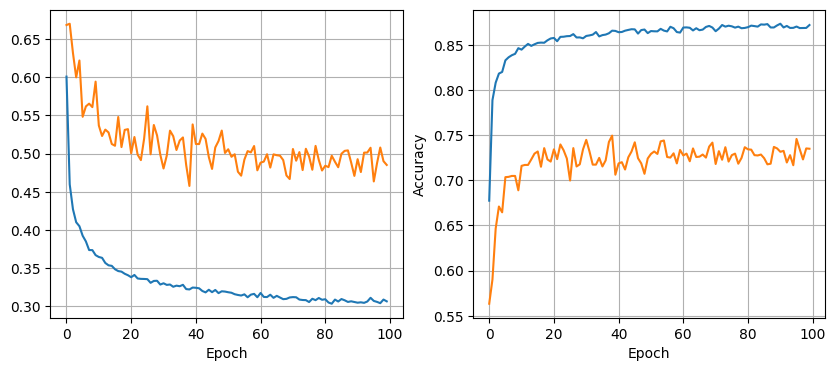

64 nodes, dropout 0, lr 0.01, batch size 32


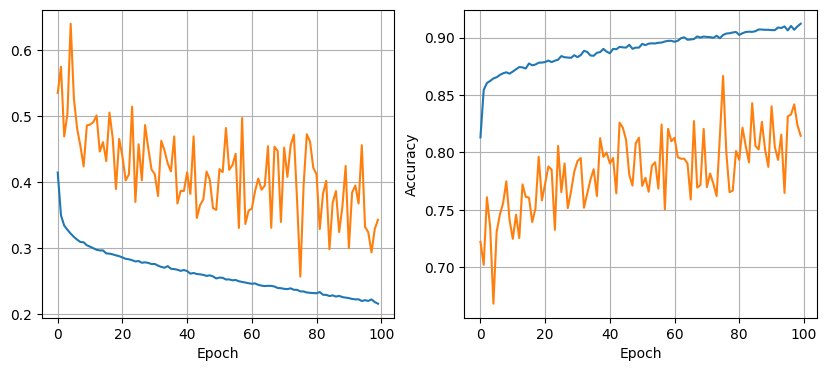

64 nodes, dropout 0, lr 0.01, batch size 64


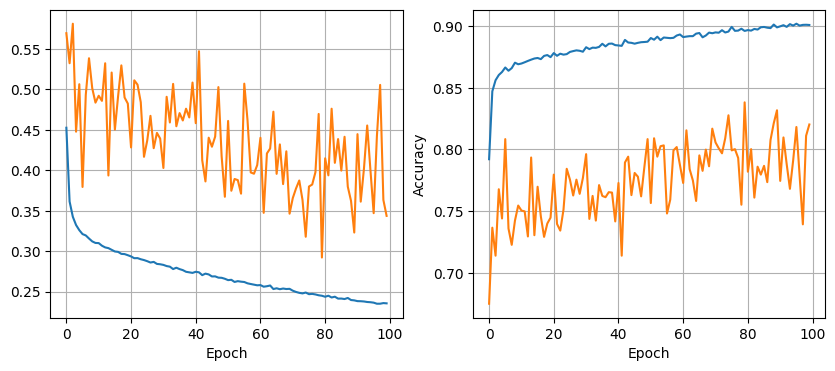

64 nodes, dropout 0, lr 0.01, batch size 128


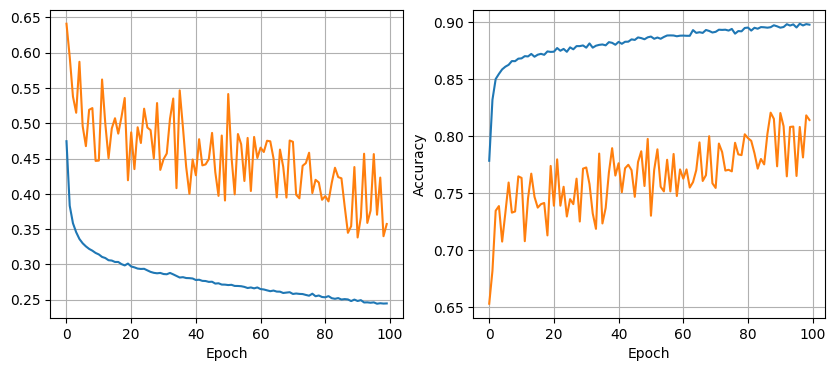

64 nodes, dropout 0, lr 0.05, batch size 32


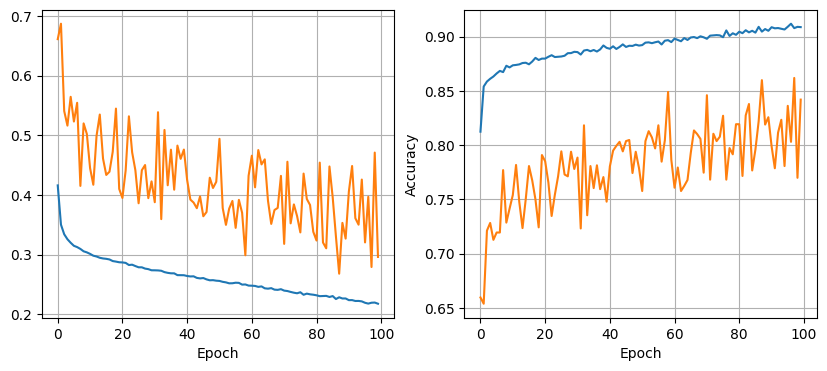

64 nodes, dropout 0, lr 0.05, batch size 64


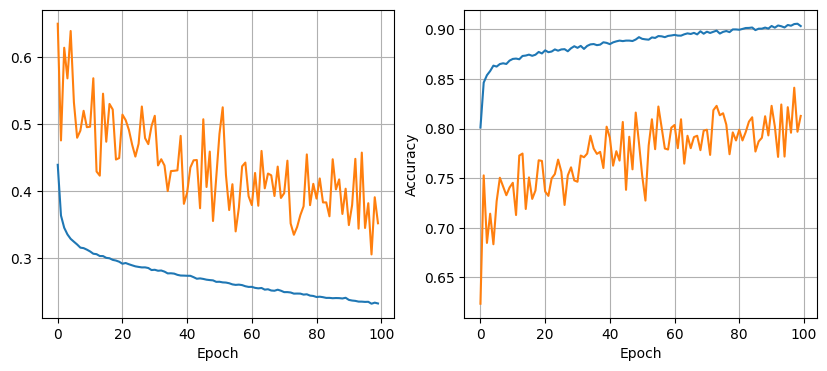

64 nodes, dropout 0, lr 0.05, batch size 128


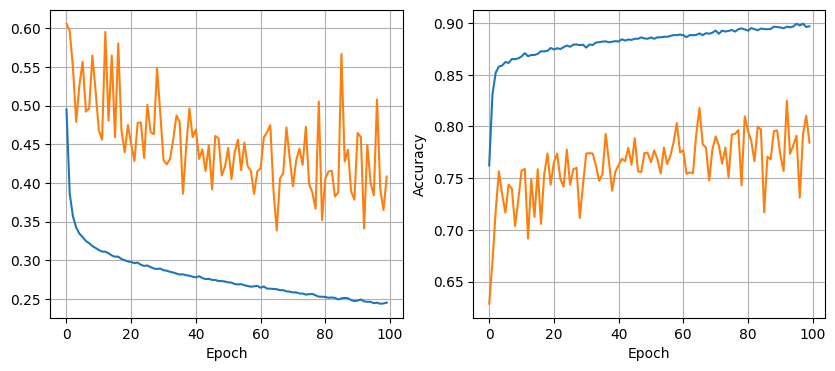

64 nodes, dropout 0, lr 0.1, batch size 32


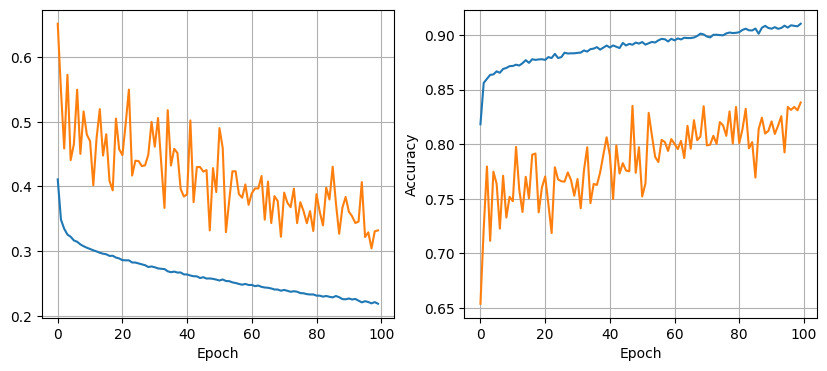

64 nodes, dropout 0, lr 0.1, batch size 64


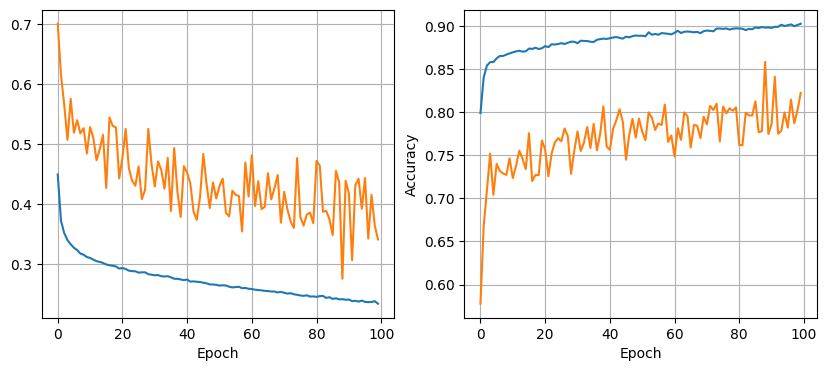

64 nodes, dropout 0, lr 0.1, batch size 128


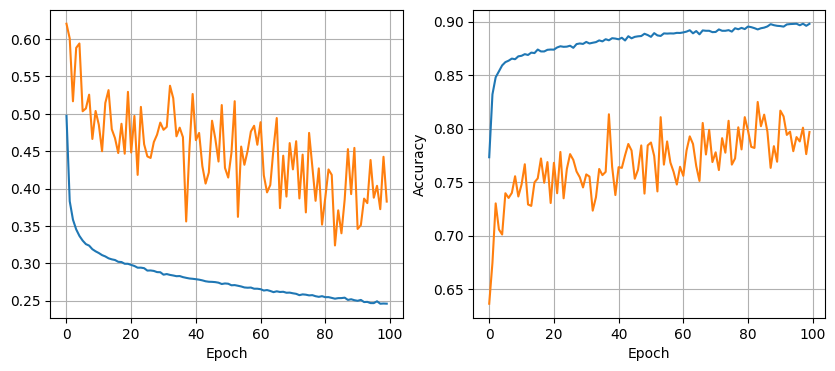

64 nodes, dropout 0.2, lr 0.01, batch size 32


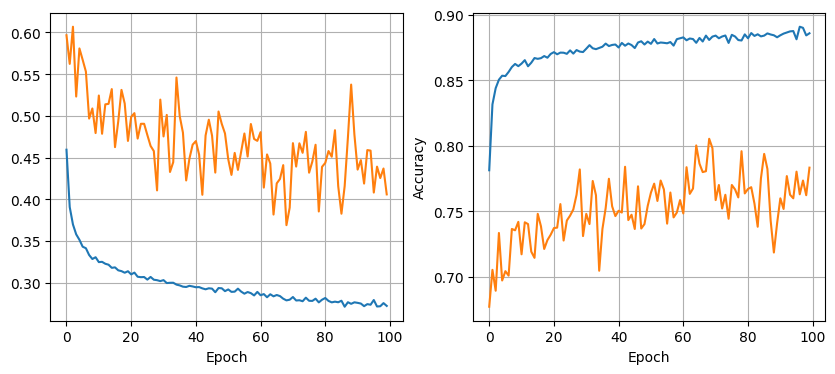

64 nodes, dropout 0.2, lr 0.01, batch size 64


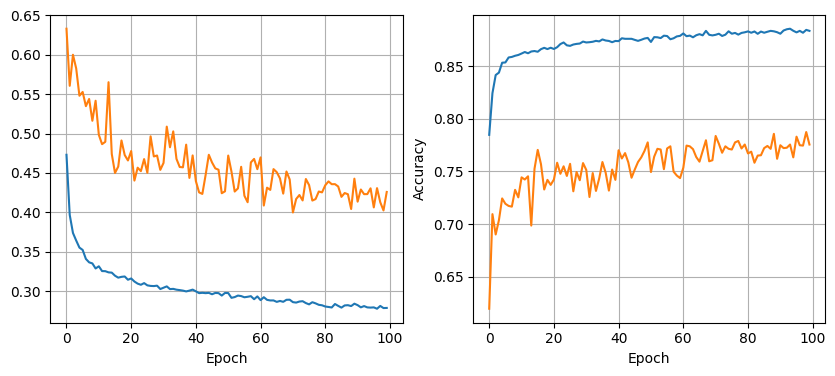

64 nodes, dropout 0.2, lr 0.01, batch size 128


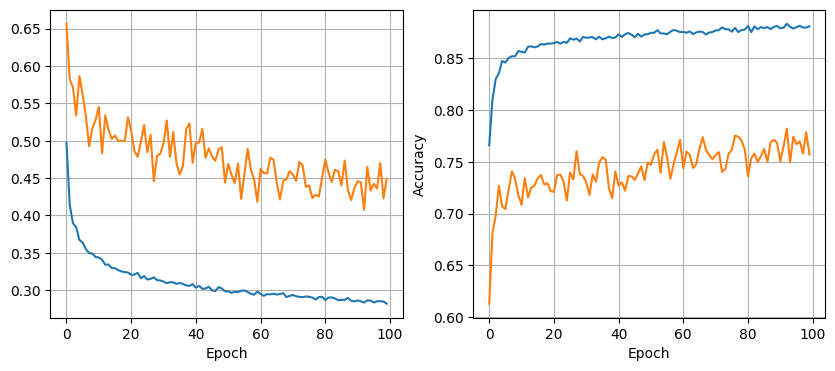

64 nodes, dropout 0.2, lr 0.05, batch size 32


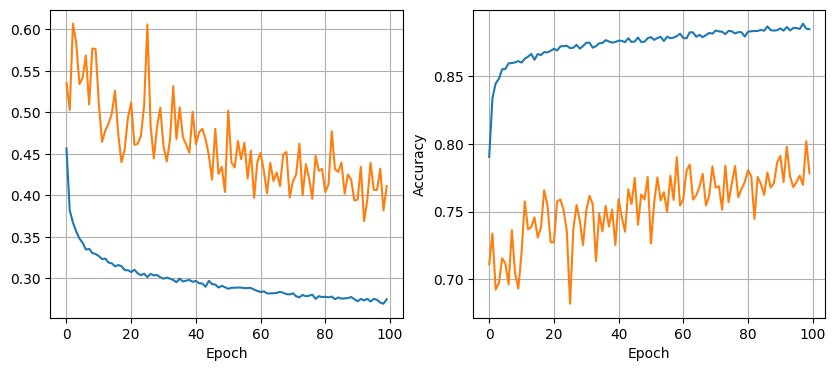

64 nodes, dropout 0.2, lr 0.05, batch size 64


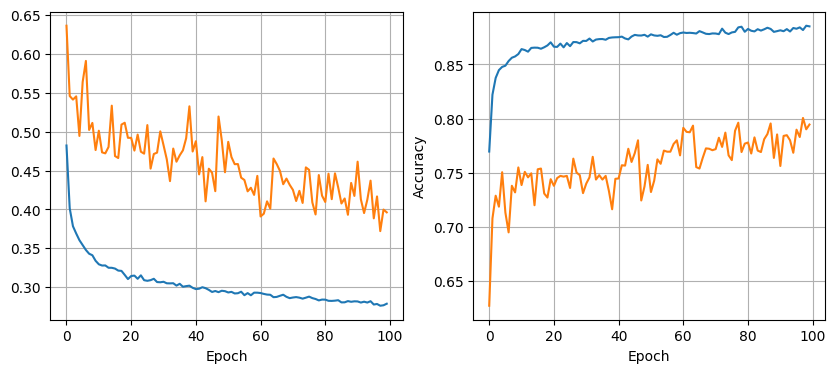

64 nodes, dropout 0.2, lr 0.05, batch size 128


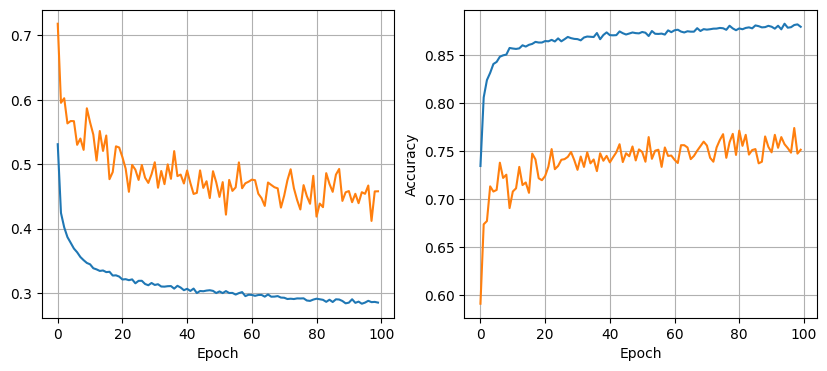

64 nodes, dropout 0.2, lr 0.1, batch size 32


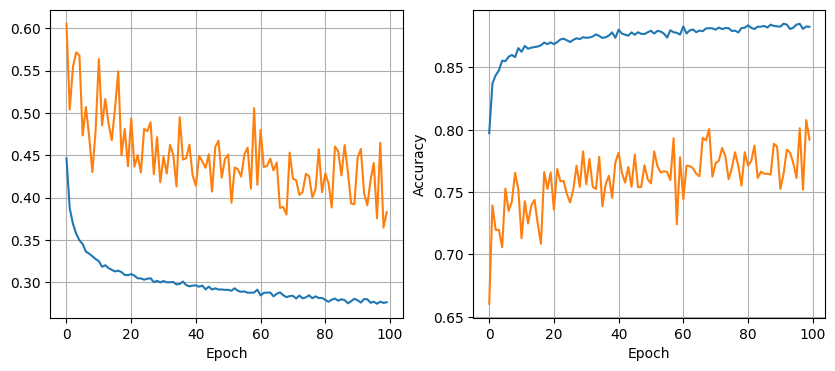

64 nodes, dropout 0.2, lr 0.1, batch size 64


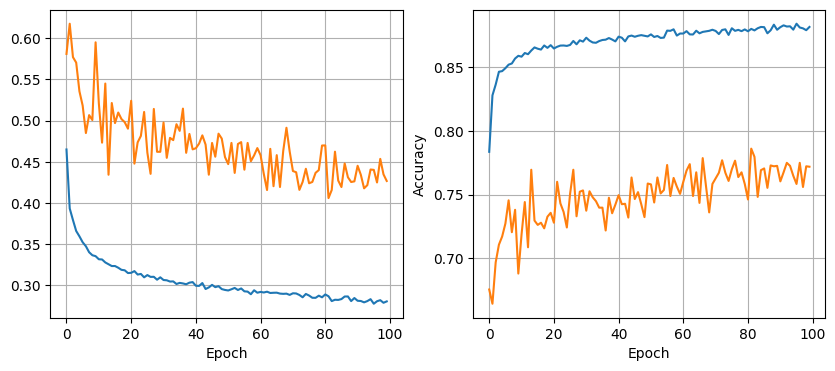

64 nodes, dropout 0.2, lr 0.1, batch size 128


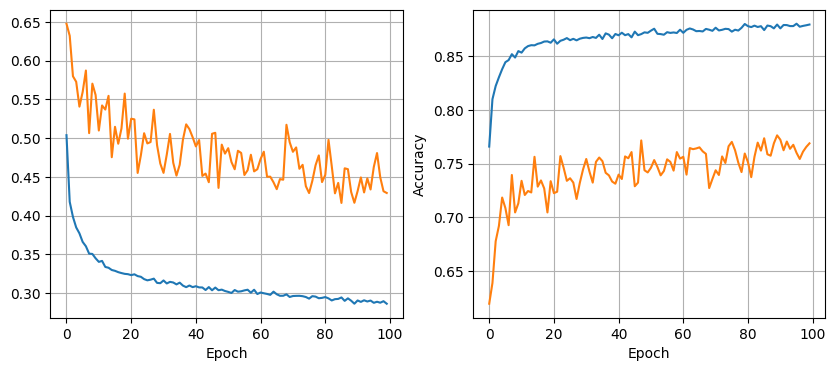

In [43]:
least_val_loss = float("inf")
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.05, 0.1]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss_metrics = model.evaluate(x_valid, y_valid, verbose=0)
        val_loss = val_loss_metrics[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [44]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1369
           1       0.87      0.94      0.91      2435

    accuracy                           0.87      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

